In [249]:
# İlk başta bize gerekli olan bazı kütüphaneleri import ederek başlayalım

In [250]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [251]:
# Verisetimizi okuyalım

In [252]:
df = pd.read_csv('data.csv')

In [253]:
# Verilerimizn hangi tip veri olduğunu kontrol edelim

In [254]:
df.dtypes

date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
street            object
city              object
statezip          object
country           object
dtype: object

In [255]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [256]:
# Değişkenler arasındaki korelasyonu görselleştirip, inceleyelim.

<AxesSubplot:>

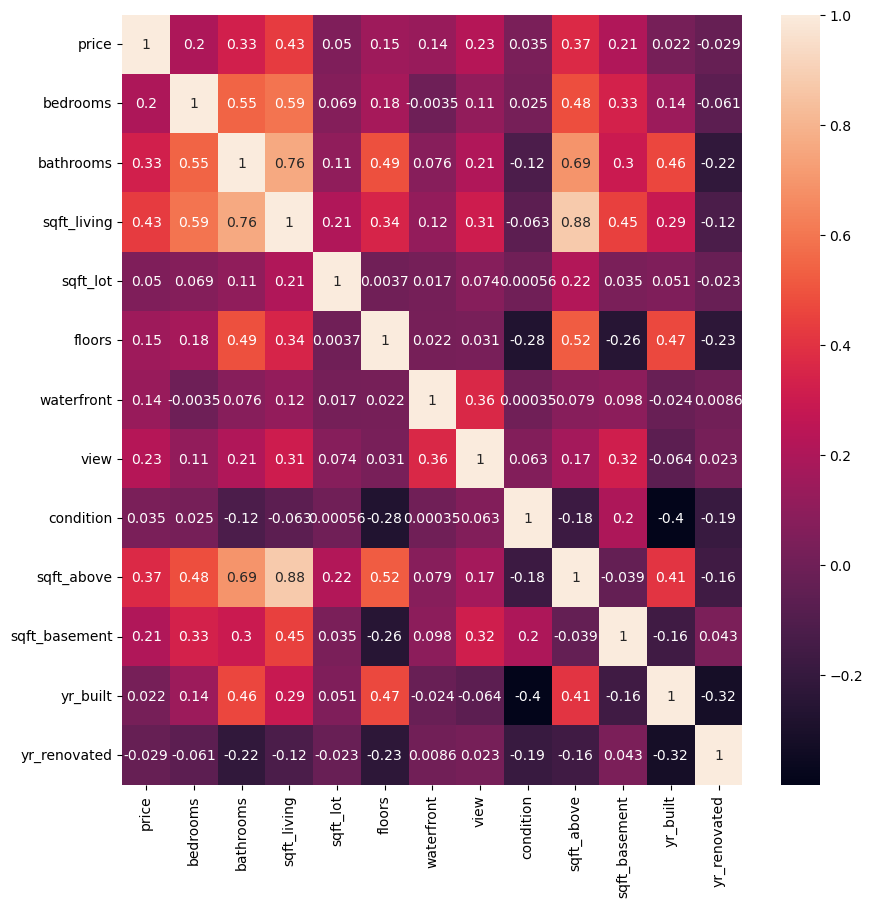

In [257]:
plt.figure(figsize=(10,10))
corr = df.corr()
sns.heatmap(corr, annot=True)

In [258]:
# Üstte float tipinde tanımlandığını gördüğümüz kolonları int veri tipine dönüştürelim

In [259]:
df['price'] = df['price'].astype('int64')
df['bedrooms'] = df['bedrooms'].astype('int64')
df['bathrooms'] = df['bathrooms'].astype('int64')
df['floors'] = df['floors'].astype('int64')
df.dtypes

date             object
price             int64
bedrooms          int64
bathrooms         int64
sqft_living       int64
sqft_lot          int64
floors            int64
waterfront        int64
view              int64
condition         int64
sqft_above        int64
sqft_basement     int64
yr_built          int64
yr_renovated      int64
street           object
city             object
statezip         object
country          object
dtype: object

In [260]:
# Price kolonunun özetini alalım

In [261]:
df['price'].describe()

count    4.600000e+03
mean     5.519630e+05
std      5.638347e+05
min      0.000000e+00
25%      3.228750e+05
50%      4.609430e+05
75%      6.549625e+05
max      2.659000e+07
Name: price, dtype: float64

In [262]:
# Fiyatı 0 olarak gözüken eksik verilerimiz var bunların kaç satırdan oluştuğunu inceleyelim

In [263]:
df[df['price'] == 0].shape

(49, 18)

In [264]:
# replace metodunu kullanarak eksik verilerimizdeki 0 değerini NaN değeri olarak değiştirelim

In [265]:
df['price'].replace(0, np.nan, inplace=True)

In [266]:
df[df['price'] == 0].shape

(0, 18)

In [267]:
# NaN değerlerimizi kontrol edelim.
# isna() metodu tüm NaN değerler için True döndürür.
# sum() metodu her bir kolondaki True değerlerinin sayısını hesaplar.

In [268]:
df.isna().sum()

date              0
price            49
bedrooms          0
bathrooms         0
sqft_living       0
sqft_lot          0
floors            0
waterfront        0
view              0
condition         0
sqft_above        0
sqft_basement     0
yr_built          0
yr_renovated      0
street            0
city              0
statezip          0
country           0
dtype: int64

In [269]:
# Price kolonundaki NaN değerlerin yerini, ortalama bir değerle dolduralım.

In [270]:
df['price'].fillna(df['price'].mean(), inplace=True)

In [271]:
df.isna().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

In [272]:
# City kolonundaki string verileri analiz edebilmek için get_dummies kullanarak 0-1 aralığına indirgeyelim.

In [273]:
city_n = pd.get_dummies(df['city'])
city_n.head()

,Algona,Auburn,Beaux Arts Village,Bellevue,Black Diamond,Bothell,Burien,Carnation,Clyde Hill,Covington,...,SeaTac,Seattle,Shoreline,Skykomish,Snoqualmie,Snoqualmie Pass,Tukwila,Vashon,Woodinville,Yarrow Point
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [274]:
# Kullanmak istemediğimiz kolonları droplayalım.
# df ve city_n verilerini birleştirmek için concat() kullanarak dt değişkeninin içine atayalım.

In [275]:
df.drop(['city', 'country', 'statezip', 'street', 'date', 'yr_renovated'], axis=1, inplace=True)
dt = pd.concat([df, city_n], axis=1)
dt.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,...,SeaTac,Seattle,Shoreline,Skykomish,Snoqualmie,Snoqualmie Pass,Tukwila,Vashon,Woodinville,Yarrow Point
0,313000.0,3,1,1340,7912,1,0,0,3,1340,...,0,0,1,0,0,0,0,0,0,0
1,2384000.0,5,2,3650,9050,2,0,4,5,3370,...,0,1,0,0,0,0,0,0,0,0
2,342000.0,3,2,1930,11947,1,0,0,4,1930,...,0,0,0,0,0,0,0,0,0,0
3,420000.0,3,2,2000,8030,1,0,0,4,1000,...,0,0,0,0,0,0,0,0,0,0
4,550000.0,4,2,1940,10500,1,0,0,4,1140,...,0,0,0,0,0,0,0,0,0,0


In [276]:
print(dt.columns)

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement',
       'yr_built', 'Algona', 'Auburn', 'Beaux Arts Village', 'Bellevue',
       'Black Diamond', 'Bothell', 'Burien', 'Carnation', 'Clyde Hill',
       'Covington', 'Des Moines', 'Duvall', 'Enumclaw', 'Fall City',
       'Federal Way', 'Inglewood-Finn Hill', 'Issaquah', 'Kenmore', 'Kent',
       'Kirkland', 'Lake Forest Park', 'Maple Valley', 'Medina',
       'Mercer Island', 'Milton', 'Newcastle', 'Normandy Park', 'North Bend',
       'Pacific', 'Preston', 'Ravensdale', 'Redmond', 'Renton', 'Sammamish',
       'SeaTac', 'Seattle', 'Shoreline', 'Skykomish', 'Snoqualmie',
       'Snoqualmie Pass', 'Tukwila', 'Vashon', 'Woodinville', 'Yarrow Point'],
      dtype='object')


In [277]:
# Veri setimizdeki değişkenlerimize normalizasyon işlemi uygulayalım

In [278]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
Cols = list(dt.columns)
s_df = scaler.fit_transform(dt[Cols])
s_df = pd.DataFrame(s_df, columns=Cols)

In [279]:
# Bağımsız(X) ve Bağımlı(y) değişkenlerimizi ayıralım
# Burada price kolonunu bağımlı değişken kabul edeceğimizden dolayı X değişkeninden dropluyoruz

In [280]:
X = s_df.drop(['price'], axis=1)
y = s_df['price']

In [281]:
# Test ve eğitim verilerimizi birbirinden ayıralım

In [282]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [283]:
# Lineer Regresyon ve r2 score kütüphanelerini importlayalım

In [284]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
model = LinearRegression()

In [285]:
# Modelimizi eğitelim

In [286]:
model.fit(X_train, y_train)

LinearRegression()

In [287]:
# r2 score sonucumuzu yazdıralım

In [288]:
model.score(X_test, y_test)

0.7022354211121511